# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?**

----
### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [77]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.


In [78]:
df = pd.read_csv("fandango_scrape.csv")

In [79]:
df.head(5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [82]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

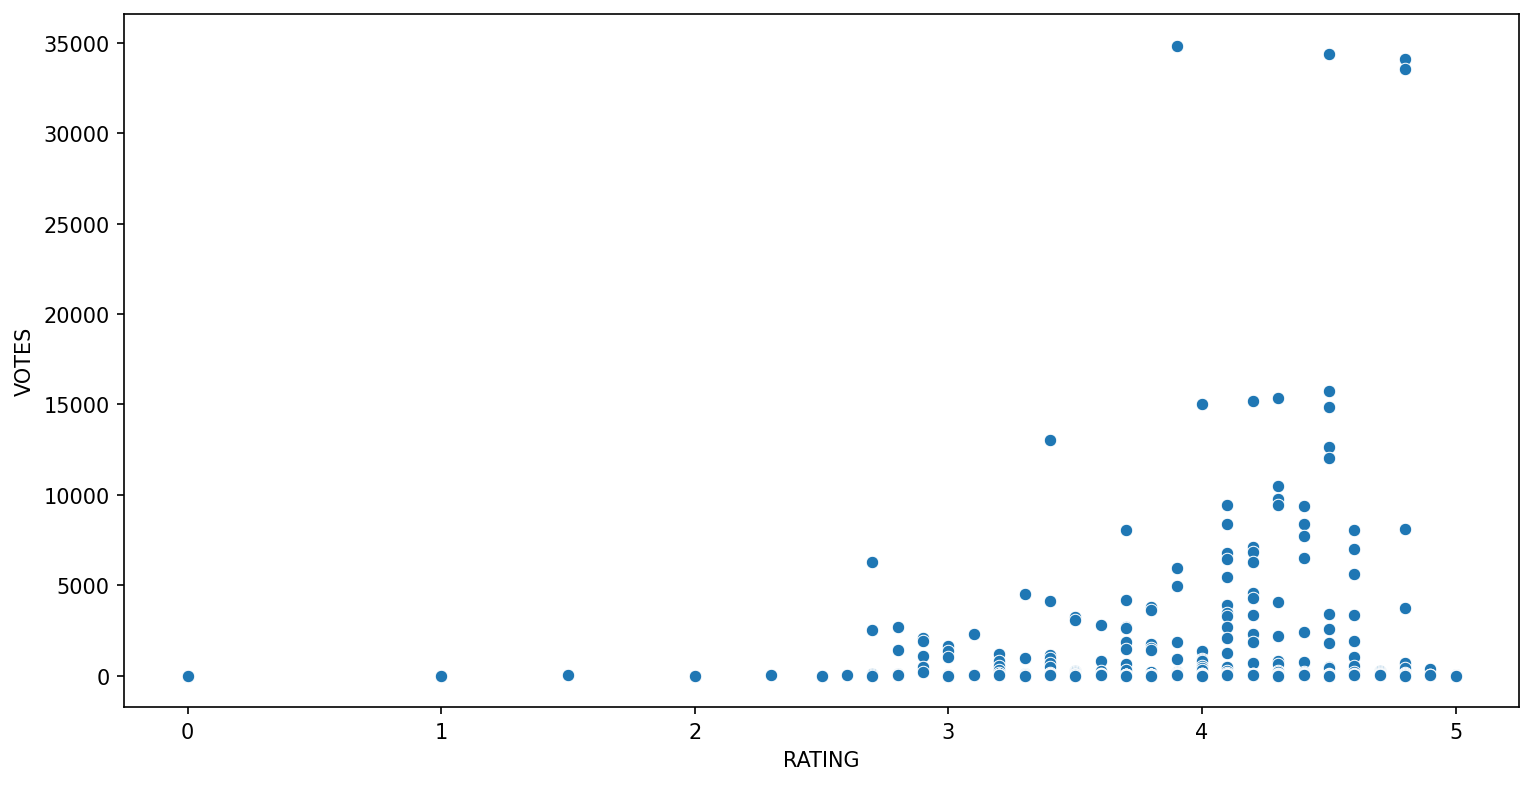

In [83]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(df,x='RATING',y='VOTES')

In [85]:
df.drop('FILM',axis=1).corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [86]:
df['YEAR'] = df['FILM'].apply(lambda year : year.split('(')[-1])

In [87]:
df['YEAR'] = df['YEAR'].apply(lambda year: year.split(')')[0])

**How many movies are in the Fandango DataFrame per year?**

In [88]:
df['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

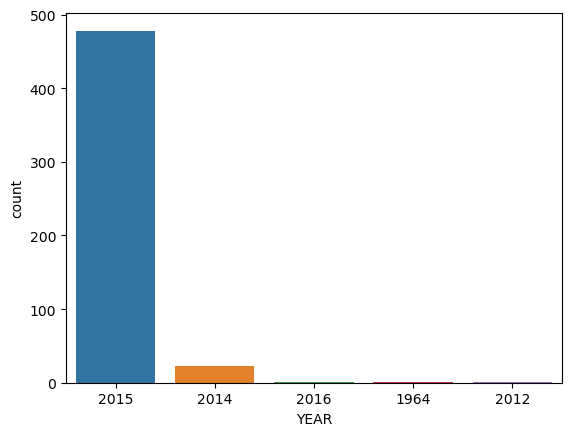

In [89]:
sns.countplot(df,x='YEAR',hue='YEAR')

**What are the 10 movies with the highest number of votes?**

In [97]:
df.sort_values(by='VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014,0.2
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015,0.3
7,Minions (2015),4.0,4.0,14998,2015,0.0
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,0.5
9,Into the Woods (2014),3.5,3.4,13055,2014,0.1


**How many movies have zero votes?**

In [98]:
df = df[df['VOTES']!=0]

**Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [99]:
df

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING)**

(0.0, 5.0)

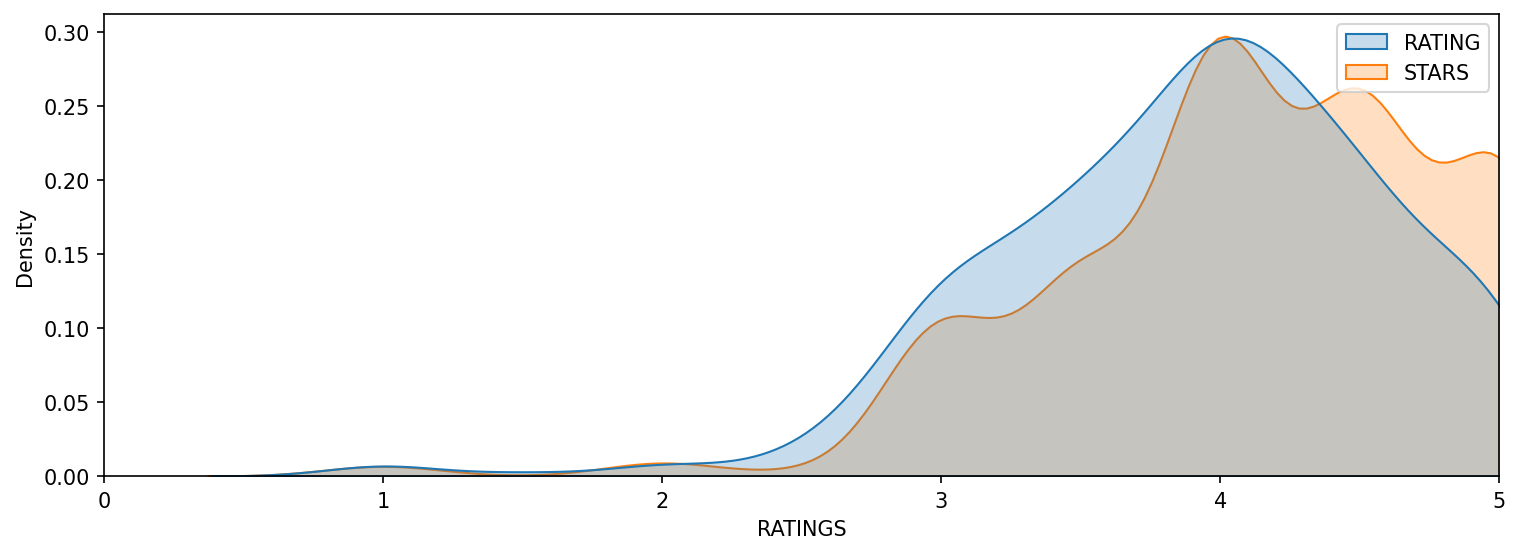

In [100]:
plt.figure(figsize=(12,4),dpi=150)
sns.kdeplot(df[['RATING','STARS']],fill=True)
plt.xlabel('RATINGS')
plt.xlim(0,5)


**Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING.**

In [103]:
df['STAR_DIFF'] = np.round(df['STARS'] - df['RATING'],2)

In [104]:
df

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Create a count plot to display the number of times a certain difference occurs:**

<Axes: xlabel='STAR_DIFF', ylabel='count'>

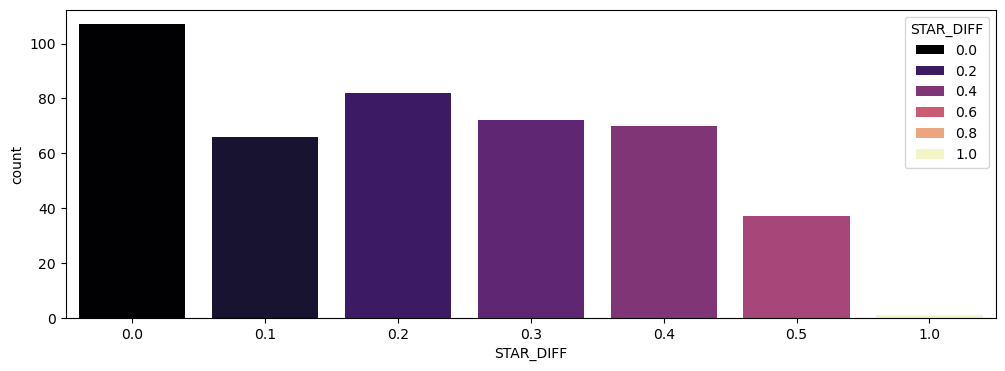

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='STAR_DIFF',hue='STAR_DIFF',palette='magma')

**We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [19]:
df[df['STAR_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Let's now compare the scores from Fandango to other movies sites and see how they compare.

**The "all_sites_scores.csv" file**

In [105]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Explore the DataFrame columns, info, description.**

In [106]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [107]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [108]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

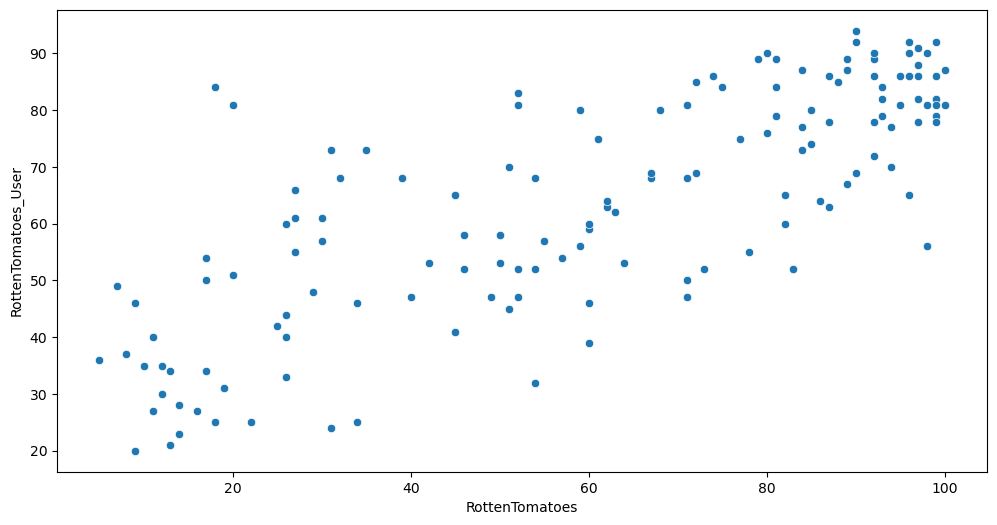

In [109]:
plt.figure(figsize=(12,6))
sns.scatterplot(all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.


In [111]:
all_sites['Rott_diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [112]:
all_sites['Rott_diff'].apply(abs).mean()

15.095890410958905

**Plot the distribution of the differences between RT Critics Score and RT User Score..**

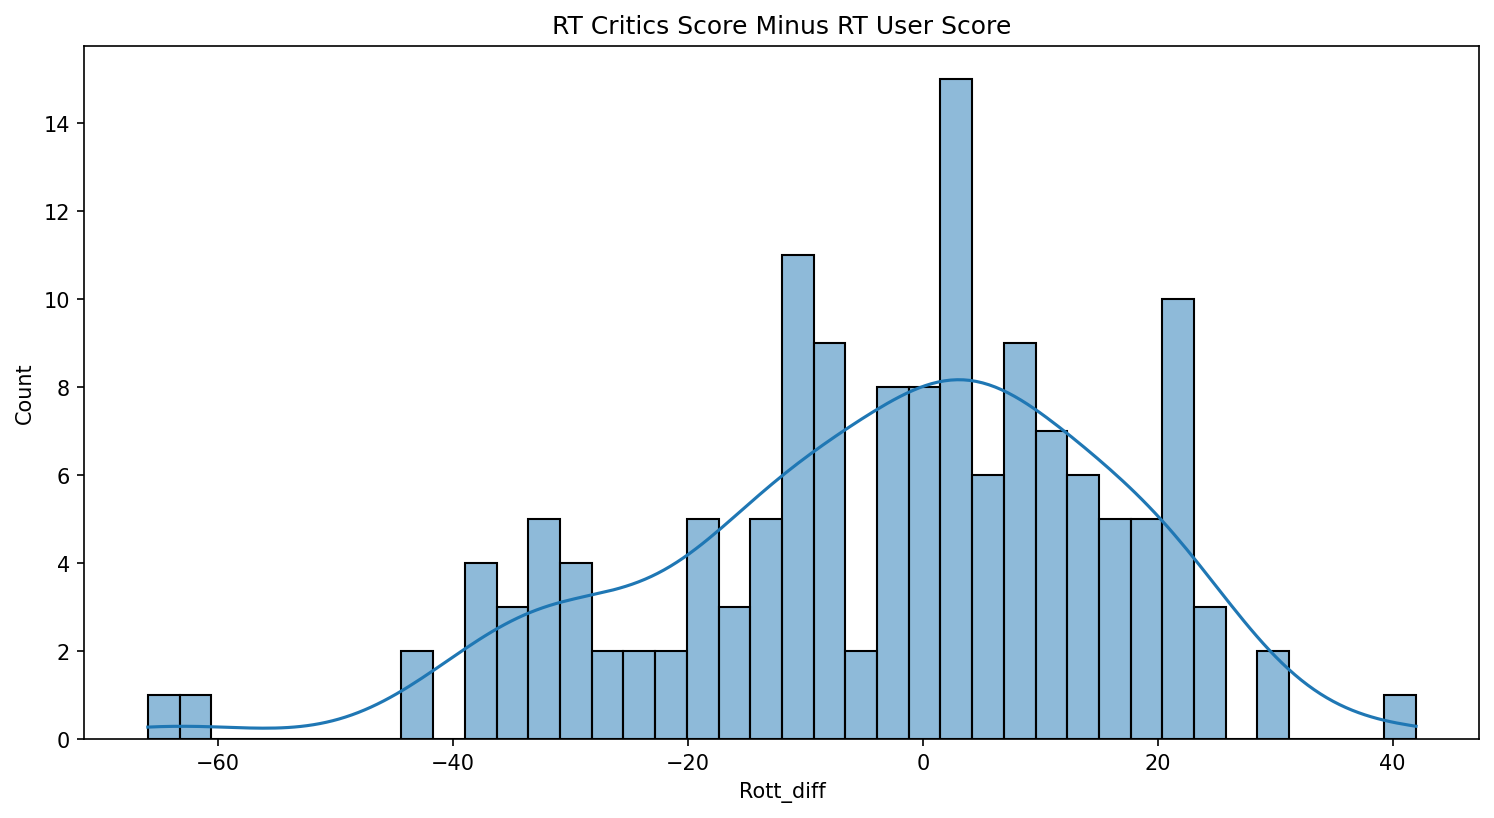

In [113]:
plt.figure(figsize=(12,6),dpi=150)
sns.histplot(all_sites,x='Rott_diff',bins=40,kde=True)
plt.title('RT Critics Score Minus RT User Score');

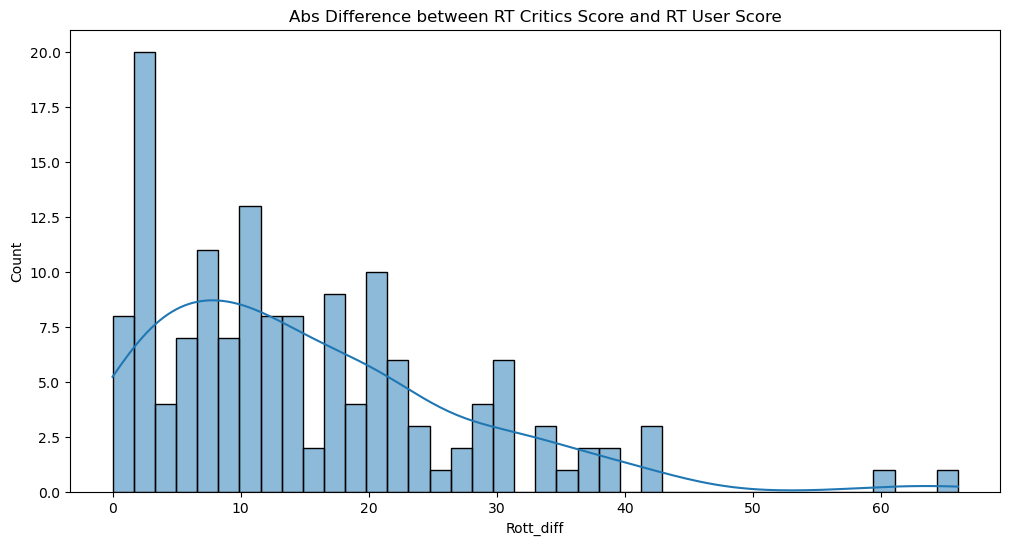

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(all_sites['Rott_diff'].apply(abs),bins=40,kde=True)
plt.title('Abs Difference between RT Critics Score and RT User Score');

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

In [114]:
all_sites[['FILM','Rott_diff']].sort_values(by='Rott_diff',ascending=True)[:5]

,FILM,Rott_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Top 5 movies critics scores higher than users on average.**

In [115]:
all_sites[['FILM','Rott_diff']].sort_values(by='Rott_diff',ascending=False)[:6]

,FILM,Rott_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

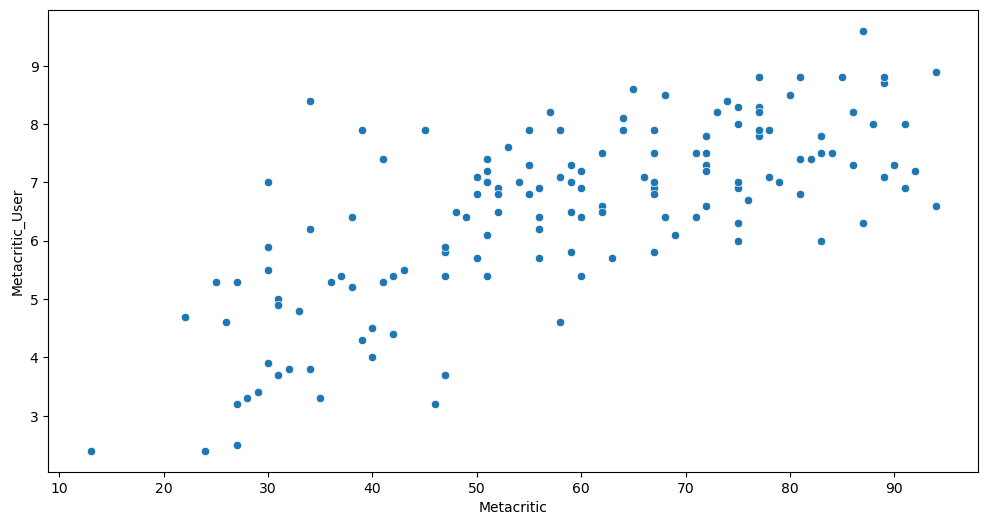

In [116]:
plt.figure(figsize=(12,6))
sns.scatterplot(all_sites,x='Metacritic',y='Metacritic_User')

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

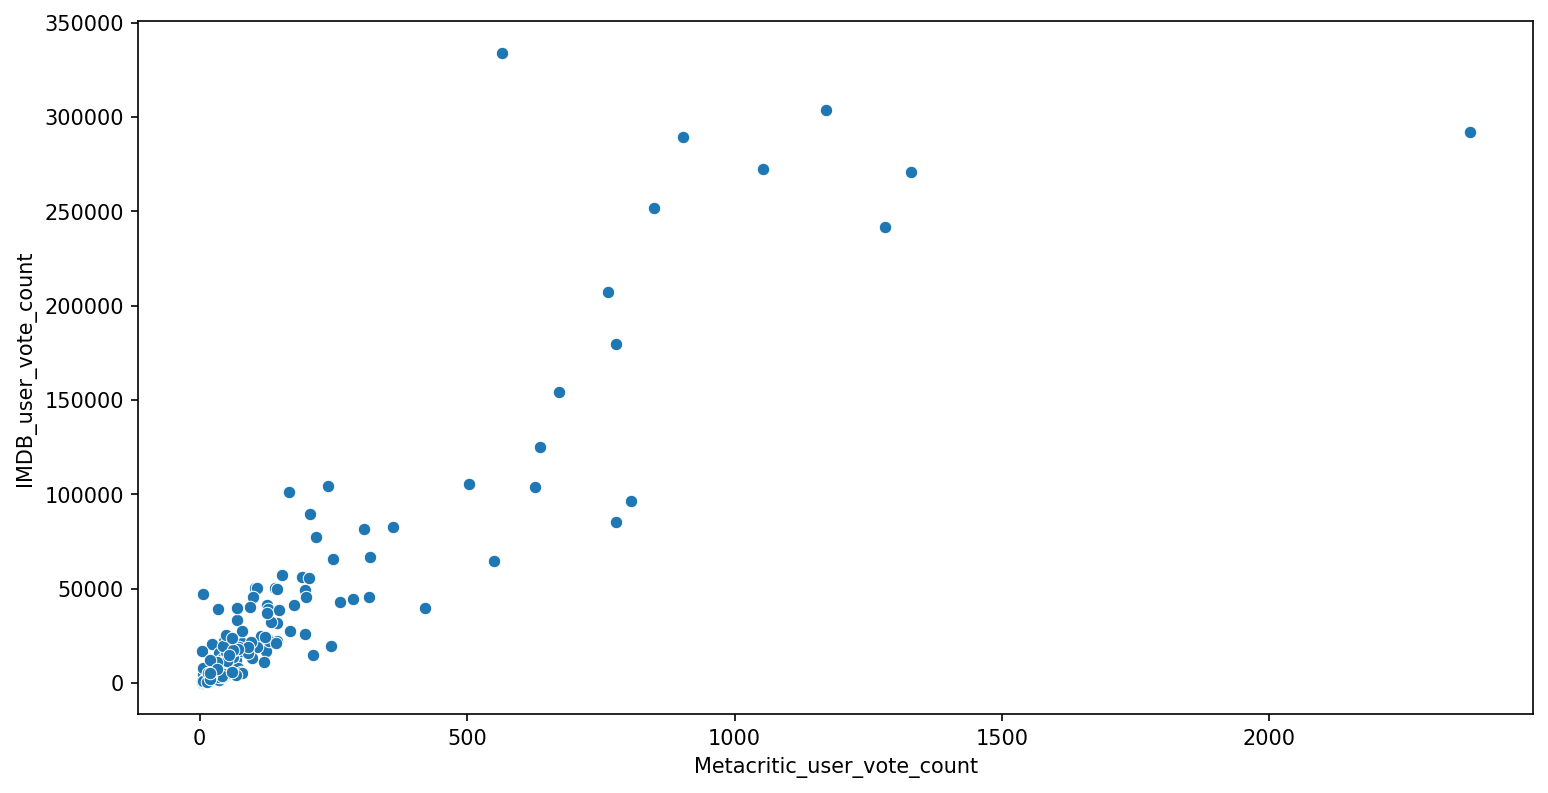

In [117]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**The highest IMDB user vote count?**

In [119]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Movie with the highest Metacritic User Vote count?**

all_sites.nlargest(1,'Metacritic_user_vote_count')

## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [120]:
df = pd.read_csv('fandango_scrape.csv')

In [121]:
merged_df = pd.merge(left = df,right=all_sites , how='inner',on='FILM')

In [122]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
 11  Rott_diff                   145 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 13.7+ KB


In [123]:
merged_df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**New normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango.**

In [125]:
merged_df.head(2)

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10


In [126]:
merged_df['RT_Norm'] = np.round(merged_df['RottenTomatoes']/20,1)
merged_df['RTU_Norm'] = np.round(merged_df['RottenTomatoes_User']/20,1)
merged_df['Meta_Norm'] = np.round(merged_df['Metacritic']/20,1)
merged_df['Meta_u_Norm'] = np.round(merged_df['Metacritic_User']/2,1)
merged_df['IMDB_Norm'] = np.round(merged_df['IMDB']/2,1)

In [128]:
merged_df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rott_diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_u_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [129]:
norm_df = merged_df[['STARS','RATING','RT_Norm','RTU_Norm', 'Meta_Norm', 'Meta_u_Norm', 'IMDB_Norm']]

In [130]:
norm_df.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_u_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

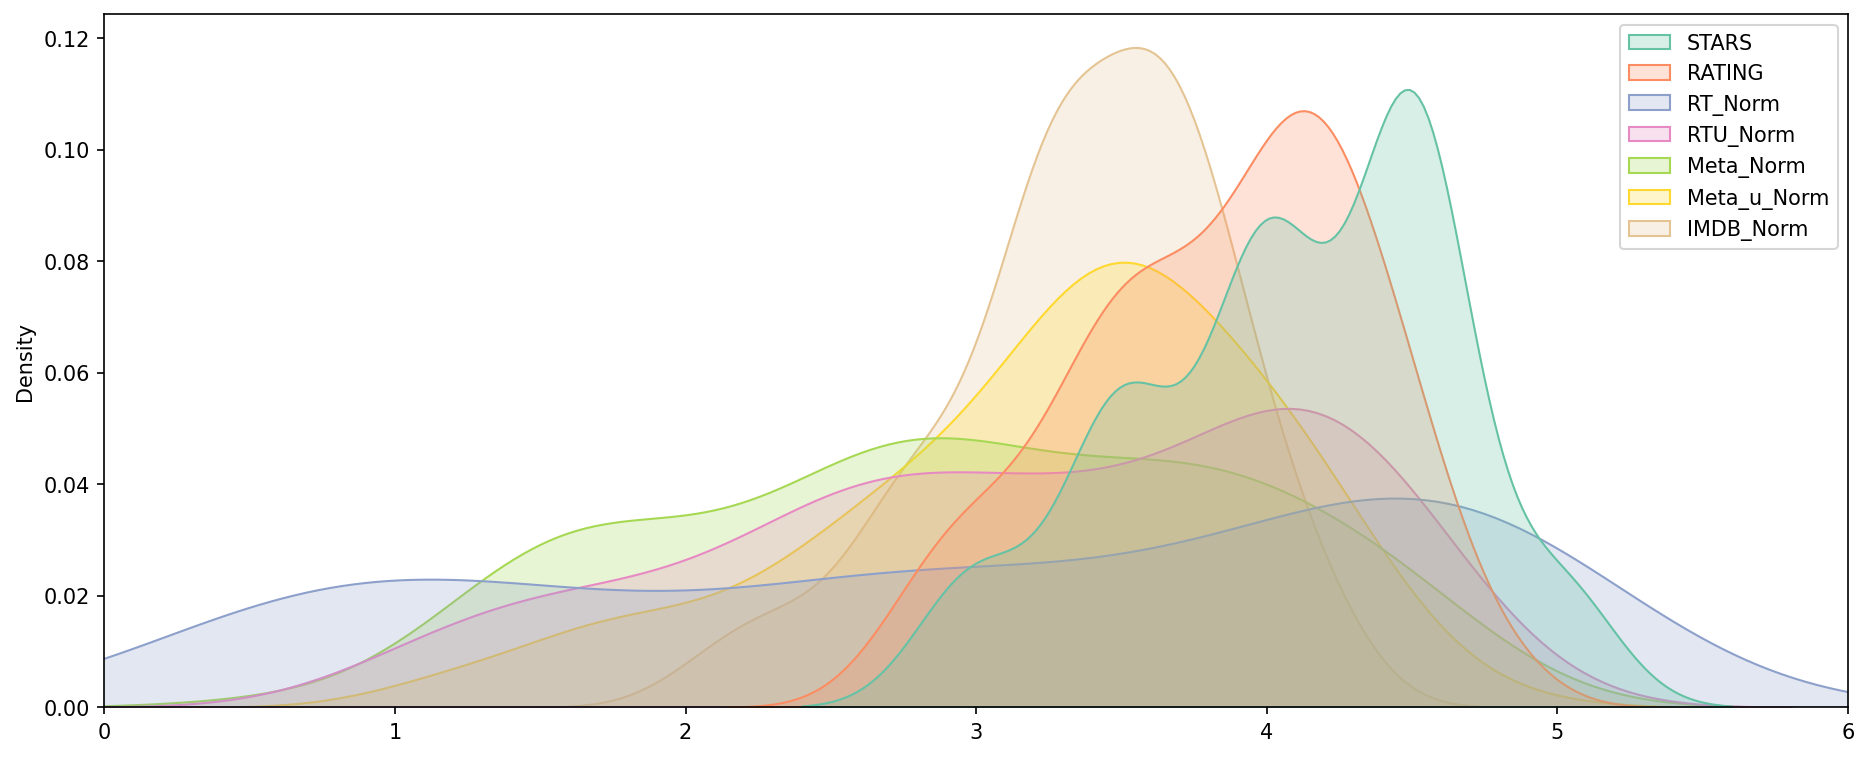

In [131]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_df,palette='Set2',fill=True)
plt.xlim(0,6);

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

<Axes: ylabel='Density'>

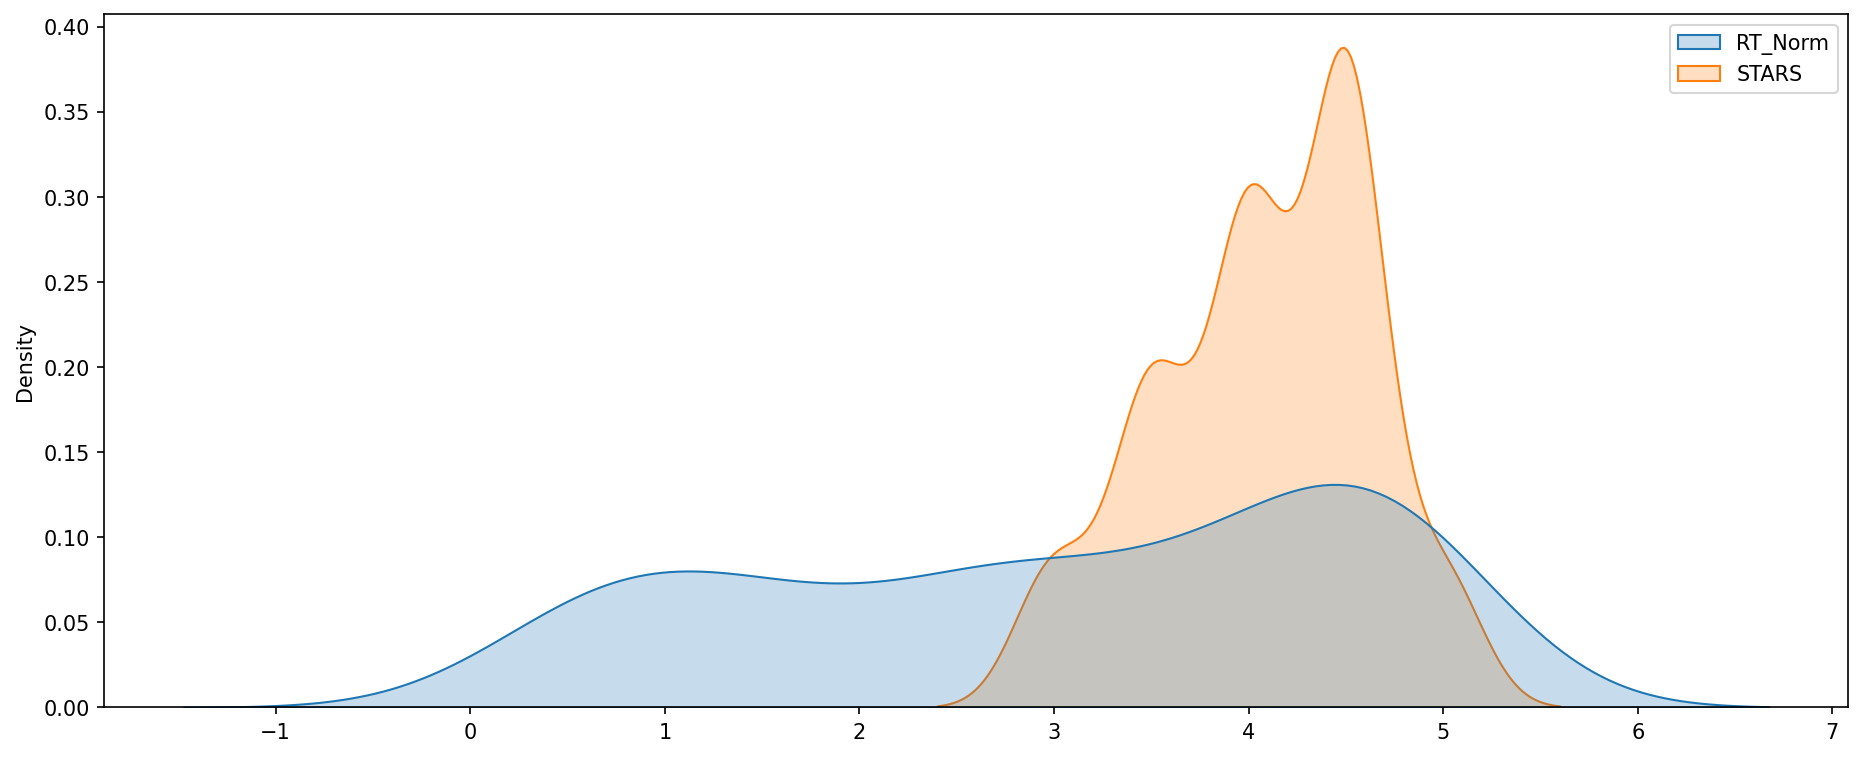

In [132]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(merged_df[['RT_Norm','STARS']],fill=True)


### How are the worst movies rated across all platforms?

<Figure size 800x1000 with 0 Axes>

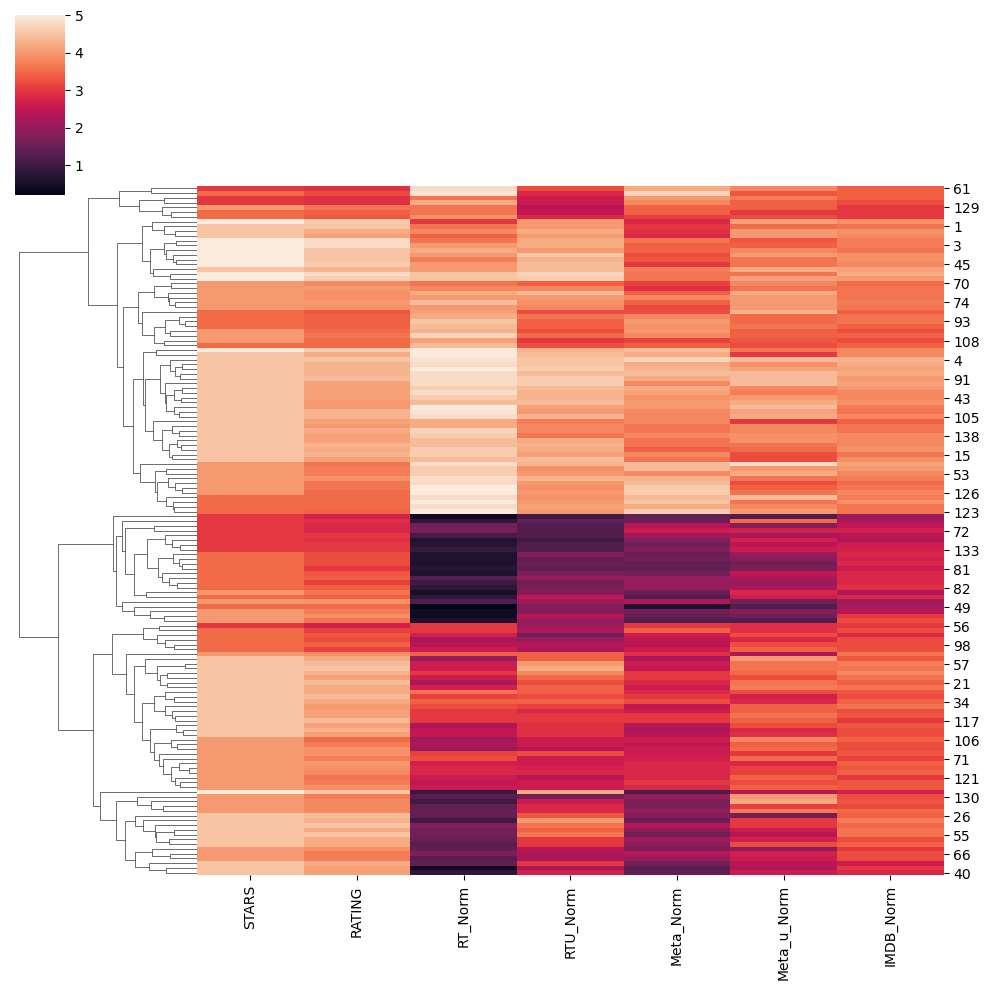

In [133]:
plt.figure(figsize=(8,10))
sns.clustermap(norm_df,col_cluster=False)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?**

In [134]:
merged_df.keys()

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rott_diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_u_Norm', 'IMDB_Norm'],
      dtype='object')

In [135]:
worst_mov = merged_df[['FILM','STARS','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_u_Norm', 'IMDB_Norm']]

In [136]:
worst_mov.nsmallest(10,'RT_Norm')

,FILM,STARS,RT_Norm,RTU_Norm,Meta_Norm,Meta_u_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,0.6,1.4,1.6,1.9,2.7


**Visualize the distribution of ratings across all sites for the top 10 worst movies.**

<Axes: ylabel='Density'>

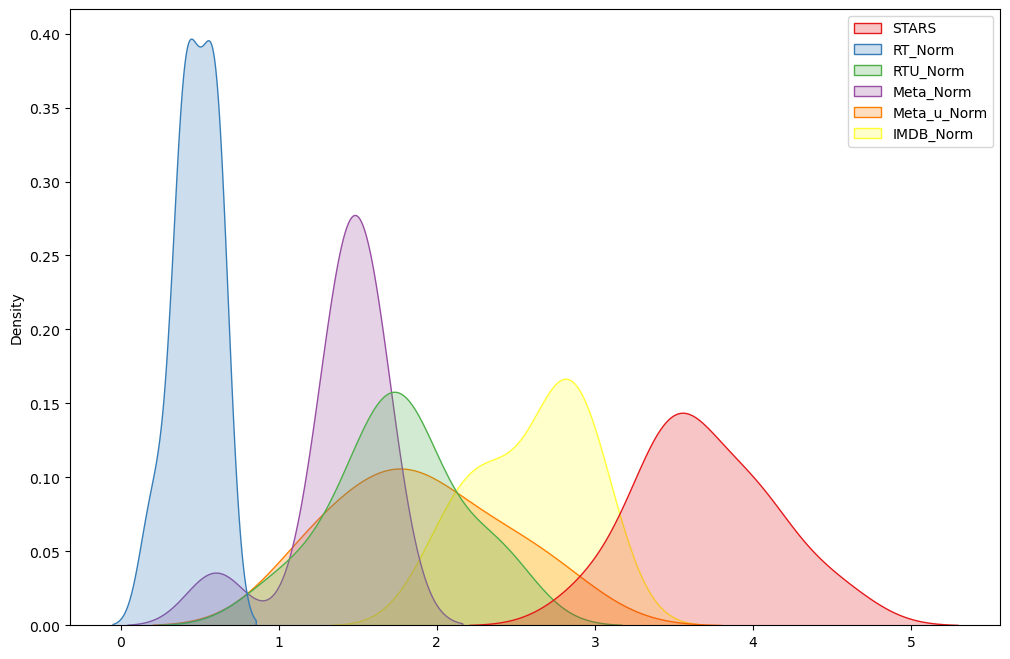

In [137]:
plt.figure(figsize=(12,8))
sns.kdeplot(worst_mov.nsmallest(10,'RT_Norm'),fill=True,palette='Set1')

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [138]:
worst_mov.nsmallest(10,'RT_Norm').iloc[1]

FILM           Taken 3 (2015)
STARS                     4.5
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_u_Norm               2.3
IMDB_Norm                 3.0
Name: 25, dtype: object

In [139]:
0.4+2.3+1.3+2.3+3

9.3

In [140]:
9.3/5

1.86

----